In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# to generate gifs
!pip install imageio
!pip install tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def plot_time_series(data):
        fig = plt.figure(figsize=(14, 8))
        plt.title('Raw wave ')
        plt.ylabel('Amplitude')
        plt.plot(np.linspace(0, 1, len(data)), data)
        plt.show()

In [0]:
parent_dir = "content/drive/My Drive/Neural Network on FPGA/Milestones/Milestone_1: Augmented Audio Samples/"

In [0]:
augmented_sample_dir = "content/drive/My Drive/Neural Network on FPGA/Milestones/Milestone_1: Augmented Audio Samples/augmented_audio_samples/add_random_distributed_noise"

In [0]:
import scipy.io.wavfile
rate,data = scipy.io.wavfile.read("./drive/My Drive/Neural Network on FPGA/Milestones/Milestone_1: Augmented Audio Samples/augmented_audio_samples/add_random_distributed_noise/sample_10_noise.wav")


In [7]:
data.shape

(405948,)

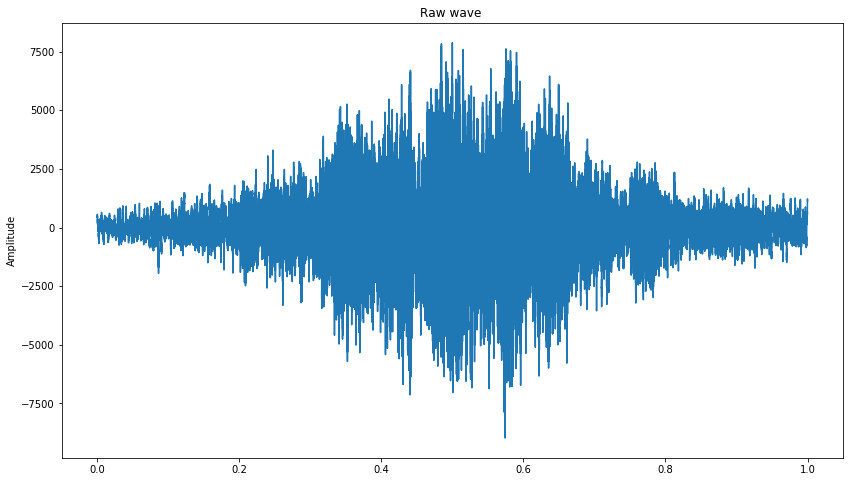

In [8]:
plot_time_series(data)

In [0]:
np.random.seed(1)
tf.random.set_seed(1)
batch_size = 128
epochs = 100
learning_rate = 1e-3
momentum = 9e-1
intermediate_dim = 120000
original_dim = 405948



(1, 405948)

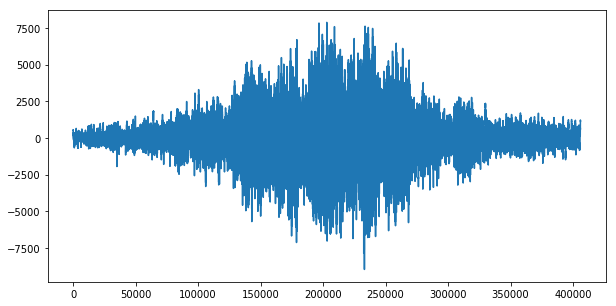

In [10]:
x_train=np.array([data]).astype('float32')
plt.figure(figsize=(10, 5))
plt.plot([float(i) for i in x_train[0]])

x_train.shape

In [11]:
training_features = x_train
training_features = training_features / np.max(training_features)
training_dataset = tf.data.Dataset.from_tensor_slices(training_features).batch(batch_size)
training_features.shape

(1, 405948)

In [12]:
training_dataset

<BatchDataset shapes: (None, 405948), types: tf.float32>

In [0]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [0]:
from tensorflow import keras
tf.random.set_seed(42)
np.random.seed(42)

input_shape = training_features[0].shape

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(120, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[120]),
    keras.layers.Dense(original_dim, activation="sigmoid"),
    keras.layers.Reshape([original_dim])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])

In [58]:
history = stacked_ae.fit(training_features, training_features, epochs=2000,
                        validation_data=[training_features, training_features])

Train on 1 samples, validate on 1 samples
Epoch 1/2000
1/1 [==============================] - 0s 40ms/sample - loss: 0.6869 - rounded_accuracy: 0.5706 - val_loss: 0.6853 - val_rounded_accuracy: 0.5788
Epoch 2/2000
1/1 [==============================] - 0s 37ms/sample - loss: 0.6853 - rounded_accuracy: 0.5788 - val_loss: 0.6833 - val_rounded_accuracy: 0.5882
Epoch 3/2000
1/1 [==============================] - 0s 37ms/sample - loss: 0.6833 - rounded_accuracy: 0.5882 - val_loss: 0.6808 - val_rounded_accuracy: 0.5988
Epoch 4/2000
1/1 [==============================] - 0s 37ms/sample - loss: 0.6808 - rounded_accuracy: 0.5988 - val_loss: 0.6775 - val_rounded_accuracy: 0.6109
Epoch 5/2000
1/1 [==============================] - 0s 34ms/sample - loss: 0.6775 - rounded_accuracy: 0.6109 - val_loss: 0.6732 - val_rounded_accuracy: 0.6247
Epoch 6/2000
1/1 [==============================] - 0s 31ms/sample - loss: 0.6732 - rounded_accuracy: 0.6247 - val_loss: 0.6676 - val_rounded_accuracy: 0.6402
Epoc

In [40]:

stacked_ae



<Figure size 108x216 with 0 Axes>

In [59]:
reconstructions = stacked_ae.predict(training_features)

reconstructions.shape

(1, 405948)

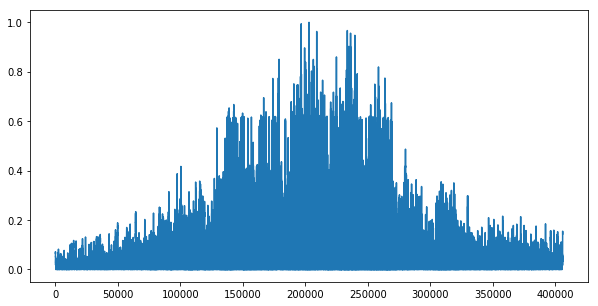

In [60]:
plt.figure(figsize=(10, 5))
plt.plot([float(i) for i in reconstructions[0]])
